In [2]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------- -------------------------------- 1.8/9.9 MB 10.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.9 MB 10.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.9 MB 10.7 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Part 1: Data Preparation and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 1.Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [2]:
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


## 2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

In [3]:
df = df.rename(columns={'Ex_rate': 'USD_to_AUD'}) 

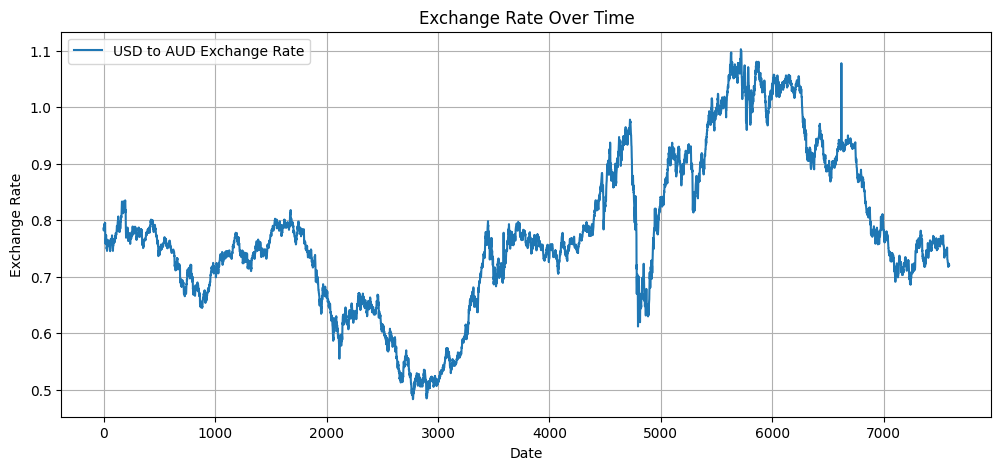

In [4]:
# Plot the USD to AUD exchange rate
plt.figure(figsize=(12, 5))
plt.plot(df['USD_to_AUD'], label='USD to AUD Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

## 3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')  
df.set_index('date', inplace=True)  

In [6]:
print(df.isnull().sum())
df['USD_to_AUD'] = df['USD_to_AUD'].interpolate(method='time')

USD_to_AUD    0
dtype: int64


# Part 2: Model Building - ARIMA
## 1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.


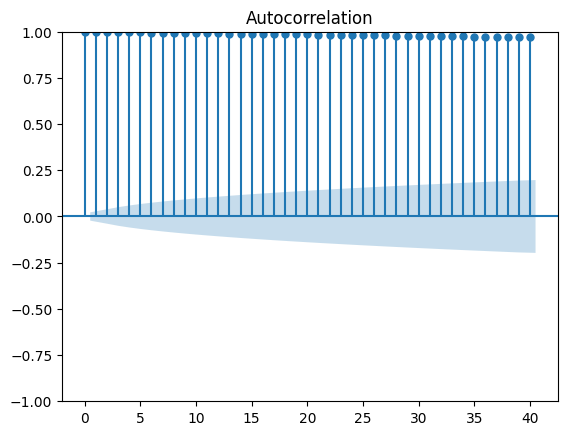

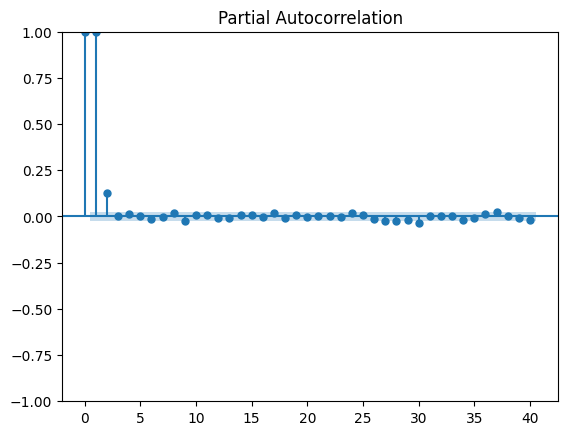

In [7]:
plot_acf(df['USD_to_AUD'], lags=40)
plot_pacf(df['USD_to_AUD'], lags=40)
plt.show()

## 2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [8]:
model = ARIMA(df['USD_to_AUD'], order=(1,1,1))
arima_result = model.fit()

print(arima_result.summary())

C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             USD_to_AUD   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 08 Apr 2025   AIC                         -56102.322
Time:                        02:48:26   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

## 3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

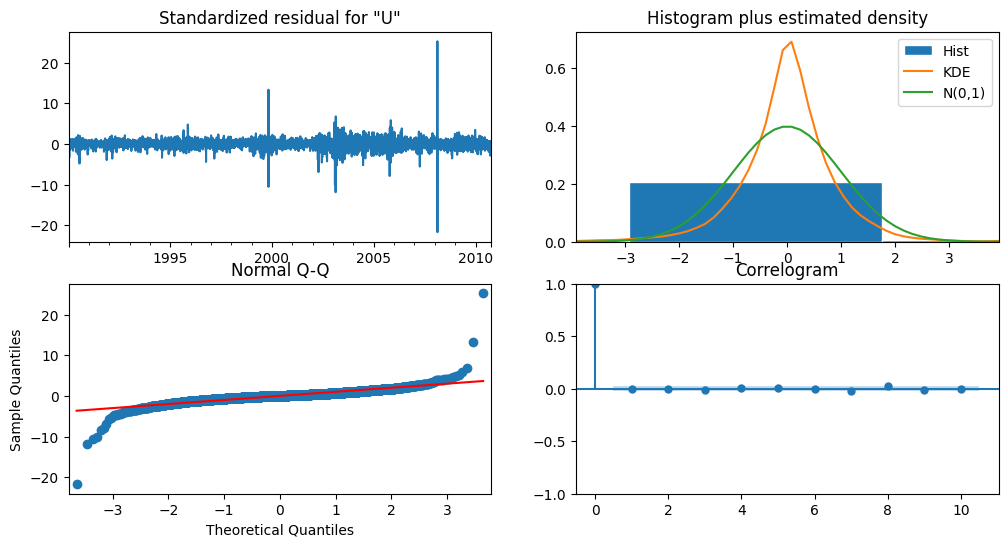

In [9]:
arima_result.plot_diagnostics(figsize=(12, 6))
plt.show()

## 4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [10]:
# Forecast next 30 steps
forecast = arima_result.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

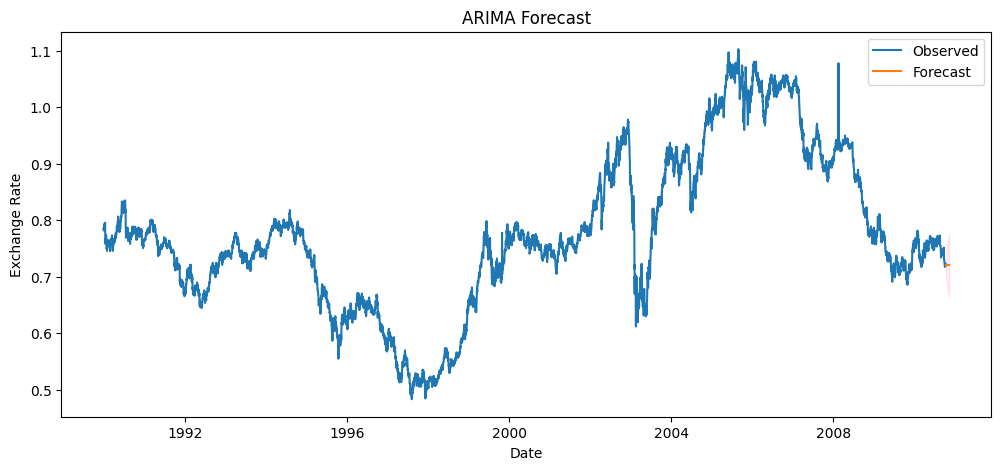

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df['USD_to_AUD'], label='Observed')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Part 3: Model Building - Exponential Smoothing
## 1.Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).


In [12]:
# Fit Exponential Smoothing model
holt_model = ExponentialSmoothing(df['USD_to_AUD'], trend='add', seasonal=None)
host = holt_model.fit()

C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [13]:
print(host)

## 2.Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components

In [14]:
holt_forecast = host.forecast(30)
print(holt_forecast)

2010-10-11    0.720851
2010-10-12    0.720843
2010-10-13    0.720834
2010-10-14    0.720826
2010-10-15    0.720817
2010-10-16    0.720809
2010-10-17    0.720800
2010-10-18    0.720792
2010-10-19    0.720783
2010-10-20    0.720774
2010-10-21    0.720766
2010-10-22    0.720757
2010-10-23    0.720749
2010-10-24    0.720740
2010-10-25    0.720732
2010-10-26    0.720723
2010-10-27    0.720715
2010-10-28    0.720706
2010-10-29    0.720698
2010-10-30    0.720689
2010-10-31    0.720681
2010-11-01    0.720672
2010-11-02    0.720664
2010-11-03    0.720655
2010-11-04    0.720646
2010-11-05    0.720638
2010-11-06    0.720629
2010-11-07    0.720621
2010-11-08    0.720612
2010-11-09    0.720604
Freq: D, dtype: float64


## 3.Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

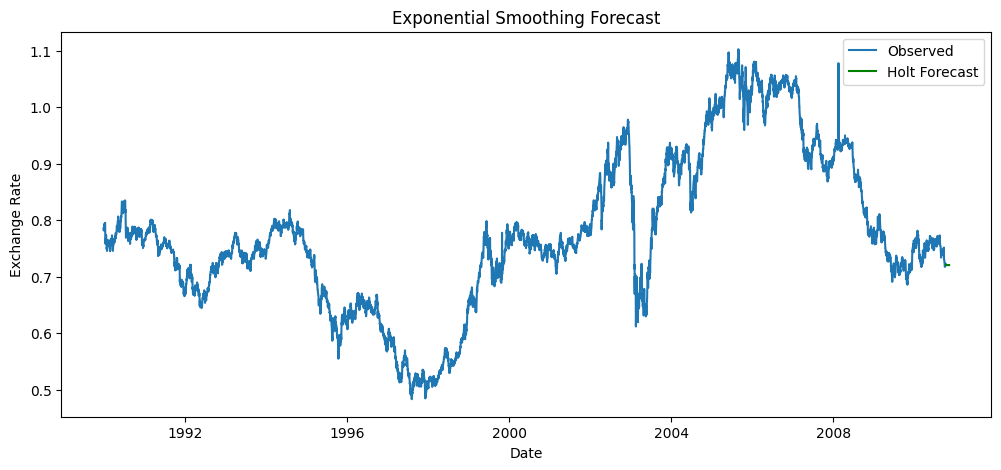

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(df['USD_to_AUD'], label='Observed')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.plot(holt_forecast.index, holt_forecast, label='Holt Forecast', color='green')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison
## 1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.




In [16]:
# Split for testing
train = df['USD_to_AUD'][:-30]
test = df['USD_to_AUD'][-30:]

# Refit models on train
arima = ARIMA(train, order=(1,1,1)).fit()
holt = ExponentialSmoothing(train, trend='add').fit()

arima_pred = arima.forecast(30)
holt_pred = holt.forecast(30)

# Metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## ARIMA score values

In [17]:
MAE_ARIMA = mean_absolute_error(test, arima_pred)
print("Mean Absolute Error :",MAE_ARIMA)
RMSE_ARIMA = np.sqrt(mean_squared_error(test, arima_pred))
print("Root Mean Squared Error",RMSE_ARIMA)
MAP_ARIMA = mape(test, arima_pred)
print("Map_Arima :",MAP_ARIMA)

Mean Absolute Error : 0.013494600805753154
Root Mean Squared Error 0.01663217791265149
Map_Arima : 1.863220748540539


## Holt score values

In [18]:
MAE_HOLT = mean_absolute_error(test, holt_pred)
print("Mean Absolute Error - HOLT :",MAE_HOLT)
RMSE_HOLT = np.sqrt(mean_squared_error(test, holt_pred))
print("Root Mean Squared Error - HOLT:",RMSE_HOLT)
MAP_HOLT = mape(test, holt_pred)
print("MAPS_HOLT :",MAP_HOLT)

Mean Absolute Error - HOLT : 0.013425279217177384
Root Mean Squared Error - HOLT: 0.01649978205123846
MAPS_HOLT : 1.8534530993046194


## 2.Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

In [19]:
# Compare models based on error metrics
if MAE_HOLT < MAE_ARIMA:
    print('HOLT performs better based on MAE_ARIMA.')
else:
    print('Exponential Smoothing performs better based on MAE.')

if RMSE_HOLT < RMSE_ARIMA :
    print('ARIMA performs better based on RMSE_HOLT.')
else:
    print('Exponential Smoothing performs better based on RMSE.')

if MAP_ARIMA < MAP_HOLT:
    print('ARIMA performs better based on MAP_HOLT.')
else:
    print('Exponential Smoothing performs better based on MAP.')

HOLT performs better based on MAE_ARIMA.
ARIMA performs better based on RMSE_HOLT.
Exponential Smoothing performs better based on MAP.


## 3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

In [20]:
# Summarize findings
print('HOLT is suitable for capturing complex patterns, while Exponential Smoothing is simpler and faster.But ARIMA its used to smaller values in the datasets,then MAP_HOLT in greater value in MAP_ARIMA')

HOLT is suitable for capturing complex patterns, while Exponential Smoothing is simpler and faster.But ARIMA its used to smaller values in the datasets,then MAP_HOLT in greater value in MAP_ARIMA
